In [11]:
import requests
import calendar
import time
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# pushshift is not up to date - you have to scrape from PRAW for updated data

# Retrieving

In [13]:
subreddits = ['Bitcoin', 'ethereum']

post_url = 'https://api.pushshift.io/reddit/search/submission'
comments_url = 'https://api.pushshift.io/reddit/search/comment'


In [14]:
pd.set_option('display.max_rows', 10)

In [15]:
datetime.utcnow()

datetime.datetime(2023, 1, 20, 10, 17, 44, 128949)

In [16]:
# the secret is to not call to much, but also not ask too much in a single call, and sleeping for 10 seconds between calls

# Sometimes the requests errors out but unixtime picks up where it left off

# from /r/pushshift: "It’s the somewhat normal pushshift api being flaky thing. It might get fixed in a few days or never. 
# Please go read the sticky if you haven’t already as it has more information and context that could be useful to you."

#removed_by_category == None

def postcall(subreddit):

    #  datetime.utcnow() = 'now',                    
    # time.mktime('x'.timetuple()) = converts to unix time,                
    # and int is int
    
    unixtime = int(time.mktime(datetime.utcnow().timetuple()))
    
    # collect epochs of posts in list
    posts = []
    
    try:
    
        for i in range(400):
            print(i)

            params = {
            "subreddit": subreddit,
            'filter': 'subreddit, id, selftext, title, created_utc, author, upvote_ratio, score, user_removed, mod_removed,retrieved_utc,updated_utc,num_comments',
            "limit": 50,
            'until': unixtime
            }

            res = requests.get(post_url, params)
            
            if res.status_code == 200:

                posts.append(res.json()["data"])

                unixtime = (res.json()["data"][-1]['created_utc'])
                
            else:
                print(res.status_code)

        time.sleep(3)
            
            
    except:
        print('failure', unixtime)
        print(res, res.status_code)

    return posts 

In [17]:
# These are the working celld for methods above. They take a while but are pretty robust. if ungainly - takes about 15 minutes to run,
# I recommend you do something else for a bit. batching 400 or 85 *50line calls x3 seconds sleep plus call plus try / accept logic for 524 failures.

# I would like to improve this at some point

In [18]:
df_posts_bitcoin_list, df_posts_ethereum_list = [postcall(i) for i in subreddits]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
524
45
46
524
47
48
49
50
51
52
53
54
524
55
56
57
58
59
60
61
62
63
524
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
524
83
524
84
85
86
87
524
88
89
90
91
92
93
94
95
96
97
524
98
99
100
524
101
102
103
104
105
106
107
108
109
110
524
111
112
113
114
115
116
117
118
524
119
524
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
524
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
524
158
159
160
524
161
162
163
164
165
166
167
168
169
170
171
524
172
173
174
175
176
177
178
179
524
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
524
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
524
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
524
25

In [19]:
# grab btc
counter = 0

for epoch in df_posts_bitcoin_list:
    
    if counter == 0:
        df_btc = pd.DataFrame(epoch)
        counter = counter + 1
    else:
        df_btc = pd.concat([df_btc,pd.DataFrame(epoch)])

df_btc


,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc
0,Bitcoin,,Bitcoin Oreo?,1.0,1,10fiixw,Expensive_Shower_605,0,1674075495,1674075509,1674075510
1,Bitcoin,,TIL: hacker = employee following directions fr...,1.0,1,10fii94,beaker38,0,1674075447,1674075459,1674075460
2,Bitcoin,,Does tracking the capacity of top lightning no...,1.0,1,10fig9s,augmentedCoin,0,1674075314,1674075327,1674075328
3,Bitcoin,,Little-Known Surveillance Program Captures Mon...,1.0,1,10fif6h,bitsteiner,0,1674075245,1674075262,1674075262
4,Bitcoin,The energy produced by mining will be turned i...,Using electric water boilers to mine bitcoin,1.0,1,10ficwm,porky11,0,1674075102,1674075116,1674075117
...,...,...,...,...,...,...,...,...,...,...,...
7,Bitcoin,[removed],Recover your stolen funds from scammers,1.0,1,yld0be,Flossiefranklin,0,1667505505,1667505520,1669825244
8,Bitcoin,,"Join me on NDAX to start trading BTC, ETH, LTC...",0.5,0,ylczix,cryptillionaire13,0,1667505458,1667505472,1669825244
9,Bitcoin,"Hey everyone,\n\nI'm looking for feedback on ...",New investment community. Looking for feedback!,1.0,1,ylcnyp,MoneyAdx,0,1667504765,1667504775,1669825248
10,Bitcoin,[removed],Free Best Xbox Gift Card Code,1.0,1,ylcj8n,crossline22,0,1667504483,1667504496,1669825249


In [20]:
# grab ethereum
counter = 0

for epoch in df_posts_ethereum_list:
    
    if counter == 0:
        df_eth = pd.DataFrame(epoch)
        counter = counter + 1
    else:
        df_eth = pd.concat([df_eth,pd.DataFrame(epoch)])

df_eth

,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc
0,ethereum,[removed],bear call sell BTCUSDT exchange: KUCOIN call p...,1.0,1,10fiknc,apex-degens,0,1674075612,1674075626,1674075626
1,ethereum,,"Visa just released a blog post: ""The Merge: Wh...",1.0,1,10fhvf0,frank__costello,0,1674073948,1674073959,1674073959
2,ethereum,[removed],Crypto Game,1.0,1,10fhgf4,Human-Field4,0,1674072954,1674072973,1674072973
3,ethereum,,"Crypto Adoption : Devs on the Rise: 23,343 Mon...",1.0,1,10fgiuu,SnooRecipes1908,0,1674070748,1674070764,1674070765
4,ethereum,I want to stake my ETH in a relatively simple ...,How to stake ETH without “selling”?,1.0,1,10ffesg,tweezy_14,0,1674068122,1674068134,1674068135
...,...,...,...,...,...,...,...,...,...,...,...
11,ethereum,,User review of the latest cross-chain token tr...,1.0,1,ylfr6o,Mortgage-Pitiful,0,1667511192,1667511203,1669825210
12,ethereum,"Hey fellow Redditors, I'm not sure if sharing...",Essay: Reducing the barrier for crypto using M...,1.0,1,ylek5s,whataheck,0,1667508730,1667508741,1669825224
13,ethereum,,Four Blockchains Making an Impact on the NFT M...,1.0,1,yld4jl,itsmeamirax,0,1667505745,1667505756,1669825243
14,ethereum,"\n\n**I already compare 35 exchanges**, mostl...",Hi for my staking and lending rates comparator...,1.0,1,ylcvo7,theablazefeces,0,1667505232,1667505245,1669825245


In [21]:
df_posts = pd.concat([df_btc, df_eth])

In [22]:
df_posts.shape

(16713, 11)

In [23]:
df_posts.head()

,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc
0,Bitcoin,,Bitcoin Oreo?,1.0,1,10fiixw,Expensive_Shower_605,0,1674075495,1674075509,1674075510
1,Bitcoin,,TIL: hacker = employee following directions fr...,1.0,1,10fii94,beaker38,0,1674075447,1674075459,1674075460
2,Bitcoin,,Does tracking the capacity of top lightning no...,1.0,1,10fig9s,augmentedCoin,0,1674075314,1674075327,1674075328
3,Bitcoin,,Little-Known Surveillance Program Captures Mon...,1.0,1,10fif6h,bitsteiner,0,1674075245,1674075262,1674075262
4,Bitcoin,The energy produced by mining will be turned i...,Using electric water boilers to mine bitcoin,1.0,1,10ficwm,porky11,0,1674075102,1674075116,1674075117


# Basic Cleaning

- Dates
- nans / [removed] / etc

In [24]:
df_posts.subreddit.value_counts()

Bitcoin          12545
ethereum          4165
u_mix-bitcoin        3
Name: subreddit, dtype: int64

In [25]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 15
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subreddit      16713 non-null  object 
 1   selftext       16713 non-null  object 
 2   title          16713 non-null  object 
 3   upvote_ratio   16713 non-null  float64
 4   score          16713 non-null  int64  
 5   id             16713 non-null  object 
 6   author         16713 non-null  object 
 7   num_comments   16713 non-null  int64  
 8   created_utc    16713 non-null  int64  
 9   retrieved_utc  16713 non-null  int64  
 10  updated_utc    16713 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1.5+ MB


In [26]:
# some duplicates snuck in between calls
df_posts = df_posts.reset_index()

In [27]:
# checking to see if this was spam from later notebook. It is an ad, but it's not a repeat
df_posts.loc[df_posts.title.str.contains('fifa')]

,index,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc
6465,16,Bitcoin,,Watch fifa world Cup live free 2022,1.0,1,zgwtpe,Ok_Cloud_772,0,1670591039,1670591051,1670591051
15514,16,ethereum,,Are you a Big fan of FIFA? Here’s a chance for...,1.0,1,z53rjz,Formal_Serve5574,1,1669456313,1669456324,1669818155
15832,34,ethereum,,Spain for the win? Fan tokens to watch during ...,1.0,1,z0ae8m,CoinsAtoZ,0,1668966609,1668966624,1669819806


In [28]:
df_posts.subreddit.value_counts()['Bitcoin']

12545

# First, a little EDA w/cleaning

In [29]:
def modreporter(df, terms):
    for i in terms:
        for k in range(2):
            item_count = df['selftext'][df['selftext'] == i].groupby(df['subreddit']).count()[k]
            item_ratio = item_count / df_posts.subreddit.value_counts()[k]
            if k == 0:
                print(f"bitcoin {str(i)} ratio: {round(item_ratio,3)*100}")
            else:
                print(f"ethereum {str(i)} ratio: {round(item_ratio,3)*100}")

                
terms = ['[removed]', '[deleted]', '']

values = modreporter(df_posts, terms)

bitcoin [removed] ratio: 14.399999999999999
ethereum [removed] ratio: 37.3
bitcoin [deleted] ratio: 0.4
ethereum [deleted] ratio: 0.2
bitcoin  ratio: 51.4
ethereum  ratio: 42.5


In [30]:
import re
def formatting(df):
    
    #get datetime
    df['created_utc'] = pd.to_datetime(df['created_utc'],unit='s')
    df['post_date'] = df['created_utc'].dt.date
    df['post_time'] = df['created_utc'].dt.time
    
    # basic formatting 
    
    # lowercase formatting
    df = df.applymap(lambda x: x.lower() if type(x) == str else x)  
    
    # newlines
    for i in ['selftext', 'subreddit']:
        for line in df[i]:
            line = ''.join(line.splitlines())
            
    # html
    df = df.apply(lambda x: x.str.strip().replace('\&\w*;', '', regex=True) if type(x) == str else x)
        

    
    # hyperlinks: tough getting at all these hyperlinks
    for i in ['title', 'selftext']: 
        #hyperlinks
        df[i] = df[i].str.replace(r'^.*?\bhttps?://[^\s<>"]+|www\.[^\s<>"]+', "", regex = True).str.strip()
        df[i] = df[i].str.replace(r'\s*https?://\S+(\s+|$)', ' ', regex = True).str.strip()
        df[i] = df[i].str.replace(r'https?://\S+(\s+|$)', ' ', regex = True).str.strip()
    
    # Dupes
    #df = df.copy()
    #df.drop_duplicates(subset=['title', 'selftext'], keep="first", inplace = True)
    
    
    # Numbers , leftover garbage, weird lemmatization
    for i in ['title', 'selftext']:
        df[i] = df[i].str.strip().replace(r'\d+','', regex = True)
        df[i] = df[i].str.replace('|hi guys|ve|aax|amp|amp amp amp|amp processing video|_|removed view poll|wrapped view poll|xb| xa |text|texttext|xb| don | xa | wa |don| gt | nt |http|beca| io ', "", regex = True)
    
    # newlines (there is probably a better way to do this earlier in the query)
    df['selftext'] = df['selftext'].str.strip().replace(r'\n*','', regex = True)
     
    
    # special charaacters except apostrophe
    for i in ['title', 'selftext']:
        df[i] = df[i].str.replace(r"[^\w\d'\s]+", " ", regex = True)
        
    # whitespace 
    for i in ['title', 'selftext']:
        df[i] = df[i].str.replace(r"\s+", " ", regex = True)

    return df



In [31]:
df_posts.shape

(16713, 12)

In [32]:
def filter_for_selftext(df):    
    df_selftext = df[(df['selftext'] != '[removed]') & (df['selftext'] != "")& (df['selftext'] != "[deleted]")]
    df_notext = df[(df['selftext'] != '[removed]') & (df['selftext'] != "[deleted]")]
    
    return df_selftext, df_notext

In [33]:
df_selftext, df_notext = filter_for_selftext(df_posts)

In [34]:
df_notext.shape

(13302, 12)

In [35]:
df_selftext.shape

(5084, 12)

In [36]:
df_posts = formatting(df_posts)
df_selftext = formatting(df_selftext)
df_notext = formatting(df_notext)

In [37]:
df_notext.shape

(13302, 14)

In [38]:
df_selftext.shape

(5084, 14)

In [39]:
df_posts.shape

(16713, 14)

In [40]:
def finalcleaner(df):
    df = df.copy()
    df.drop_duplicates(subset=['title', 'selftext'], keep="first", inplace = True)
    df.drop_duplicates(subset=None, keep="first", inplace=True)
    return df
    
df_posts = finalcleaner(df_posts)
df_selftext = finalcleaner(df_selftext)
df_notext.drop_duplicates(subset=['title'], keep="first", inplace = True)

In [41]:
df_posts.shape

(14347, 14)

In [42]:
df_selftext.shape

(4944, 14)

In [43]:
df_notext.shape

(11999, 14)

# EDA (thoughts for next notebook)

# Questions

1. Ads? 
2. Removed? Removed text?
3. How many are text vs. content?
4. Authorship
5. Title keywords
6. Text keywords
7. Title / text relationship
8. Price / timeseries

- Compare old time (pre-popular) subreddit to current


# Authorship

In [44]:
df_posts.groupby(['author']).score.sum()

author
--_--______---_---    3
--not--me--           1
-beef-supreme-        1
-captain_nemo-        1
-corey_dakota-        1
                     ..
zuzka_123             2
zweistein1326         1
zxx5                  4
zyckra                1
zydsag                1
Name: score, Length: 8537, dtype: int64

In [45]:
# Get weightiness (by count) of users for split


df_author_subs = df_posts.groupby(['author', 'subreddit']).size().unstack('subreddit', fill_value=0)


In [46]:
df_author_subs['total'] = df_author_subs['bitcoin'] + df_author_subs['ethereum']


In [47]:
df_author_subs['eth_ratio'] = df_author_subs['ethereum'] / df_author_subs['total']

In [48]:
df_author_subs.sort_values('eth_ratio', ascending = False)

subreddit,bitcoin,ethereum,u_mix-bitcoin,total,eth_ratio
author,,,,,
nevilleharris,0,1,0,1,1.0
ethereumaaron,0,1,0,1,1.0
junpw,0,1,0,1,1.0
dvodelenup,0,1,0,1,1.0
ctomanyn,0,1,0,1,1.0
...,...,...,...,...,...
gogoman,1,0,0,1,0.0
gogeniemo_9986,1,0,0,1,0.0
godzilla98s,1,0,0,1,0.0


In [49]:
df_author_subs = df_author_subs.loc[df_author_subs.index != '[deleted]']

In [50]:
df_author_subs.sort_values('eth_ratio', ascending = False)

subreddit,bitcoin,ethereum,u_mix-bitcoin,total,eth_ratio
author,,,,,
blrtw1994,0,1,0,1,1.0
ethereum_node,0,2,0,2,1.0
dvodelenup,0,1,0,1,1.0
junpw,0,1,0,1,1.0
ctomanyn,0,1,0,1,1.0
...,...,...,...,...,...
gogoman,1,0,0,1,0.0
gogeniemo_9986,1,0,0,1,0.0
godzilla98s,1,0,0,1,0.0


In [51]:

df_author_subs.describe()

subreddit,bitcoin,ethereum,u_mix-bitcoin,total,eth_ratio
count,8536.000000,8536.000000,8536.000000,8536.000000,8536.000000
mean,1.326382,0.336809,0.000234,1.663191,0.207301
std,2.628996,1.947786,0.021647,3.224261,0.396840
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000
max,114.000000,146.000000,2.000000,150.000000,1.000000


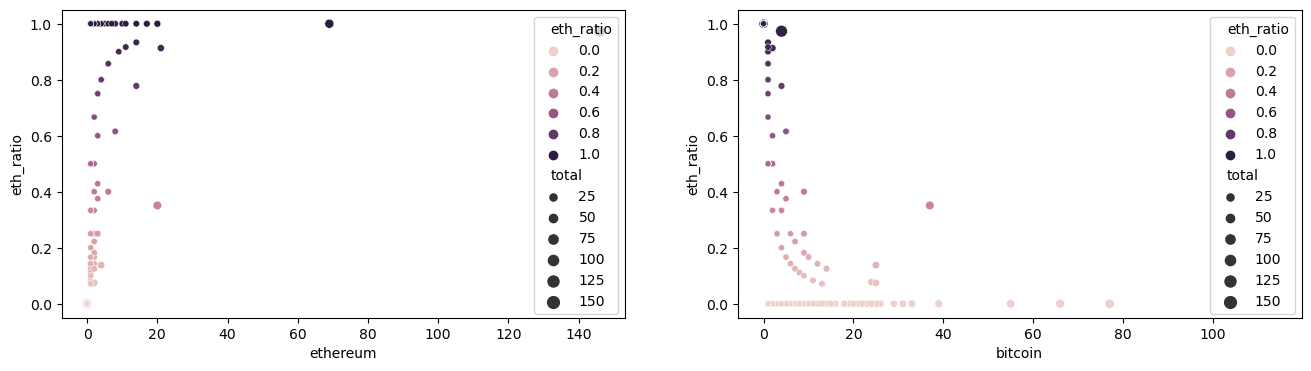

In [67]:
f, axes = plt.subplots(1, 2, figsize=(16,4))


sns.scatterplot(data=df_author_subs, x="ethereum", y="eth_ratio", hue = 'eth_ratio', size = 'total', ax=axes[0])
sns.scatterplot(data=df_author_subs, x="bitcoin", y="eth_ratio", hue = 'eth_ratio', size = 'total', ax=axes[1])


plt.savefig('../images/postingratio')




# wow that crossover is so minimal

In [53]:
df_author_subs[df_author_subs.total > 5].sort_values(by = 'eth_ratio', ascending = False)

subreddit,bitcoin,ethereum,u_mix-bitcoin,total,eth_ratio
author,,,,,
combtimee,0,10,0,10,1.0
0xsalazar,0,17,0,17,1.0
historical_walk6927,0,7,0,7,1.0
frank__costello,0,8,0,8,1.0
apex-degens,0,69,0,69,1.0
...,...,...,...,...,...
fmorenol,6,0,0,6,0.0
fnetma,24,0,0,24,0.0
freebsdlego1,7,0,0,7,0.0


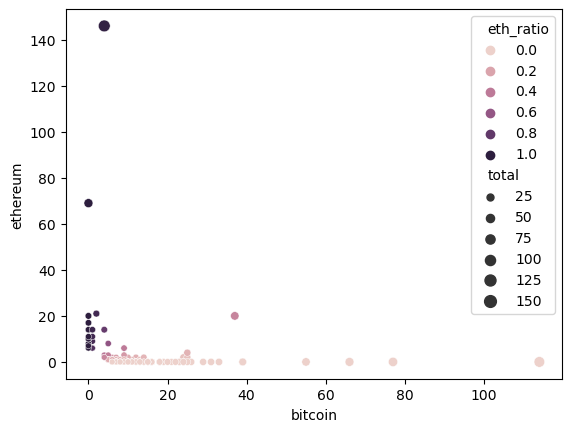

In [54]:
# No power users are split, or only one is

sns.scatterplot(data=(df_author_subs[df_author_subs.total > 5]), x="bitcoin", y="ethereum", hue = 'eth_ratio', size = 'total');


# final check

In [55]:
df_posts.head(2)

,index,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc,post_date,post_time
0,0,bitcoin,,bitcoin oreo,1.0,1,10fiixw,expensive_shower_605,0,2023-01-18 20:58:15,1674075509,1674075510,2023-01-18,20:58:15
1,1,bitcoin,,til hacker employee following directions from ceo,1.0,1,10fii94,beaker38,0,2023-01-18 20:57:27,1674075459,1674075460,2023-01-18,20:57:27


In [56]:
df_selftext = df_selftext.reset_index()
df_selftext.head(2)

,level_0,index,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc,post_date,post_time
0,4,4,bitcoin,the energy produced by mining will be turned i...,using electric water boilers to mine bitcoin,1.0,1,10ficwm,porky11,0,2023-01-18 20:51:42,1674075116,1674075117,2023-01-18,20:51:42
1,5,5,bitcoin,hello i am looking to swap a good portion of s...,btc to usdt,1.0,1,10fi2u2,gord23,0,2023-01-18 20:40:35,1674074446,1674074447,2023-01-18,20:40:35


In [57]:
df_notext = df_notext.reset_index()
df_notext.head(2)

,level_0,index,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc,post_date,post_time
0,0,0,bitcoin,,bitcoin oreo,1.0,1,10fiixw,expensive_shower_605,0,2023-01-18 20:58:15,1674075509,1674075510,2023-01-18,20:58:15
1,1,1,bitcoin,,til hacker employee following directions from ceo,1.0,1,10fii94,beaker38,0,2023-01-18 20:57:27,1674075459,1674075460,2023-01-18,20:57:27


In [58]:
df_posts.drop(columns = 'index', inplace = True)
df_selftext.drop(columns = ['index', 'level_0'], inplace = True)
df_notext.drop(columns = ['index', 'level_0'], inplace = True)

In [59]:
df_notext.shape

(11999, 13)

In [60]:
df_selftext.shape

(4944, 13)

In [61]:
df_posts.shape

(14347, 13)

In [62]:
df_selftext.selftext.isna().sum()

0

In [63]:
df_posts.to_csv('../data/posts.csv', index = False)
df_selftext.to_csv('../data/selftext.csv', index = False)
df_notext.to_csv('../data/notext.csv', index = False)


In [64]:
df_selftext.title.head()

0         using electric water boilers to mine bitcoin
1                                          btc to usdt
2                                       hypothetically
3          how to manage different btcs on one ledger 
4    can we discuss dollar cost araging dca as an i...
Name: title, dtype: object